# Task-4 Exploratory Data Analysis on Global Terrorism

## Objective:

#### * As a security/defence analyst, try to find out the hot zone of terrorism.
#### * What all security issues and insights you can derive by EDA?

Author : Anujith R


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("globalterrorismdb_0718dist.csv")

In [4]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
data.shape

(181691, 135)

In [6]:
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [28]:
# here we are checking values and  Null values counts
data.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 67 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  location          55495 non-null   object 
 16  summary           11

In [8]:
#here we can check percentage of  null values
pd.set_option('Display.max_rows',None)
data.isnull().sum()/len(data.index)*100

eventid                0.000000
iyear                  0.000000
imonth                 0.000000
iday                   0.000000
approxdate            94.914993
extended               0.000000
resolution            98.778145
country                0.000000
country_txt            0.000000
region                 0.000000
region_txt             0.000000
provstate              0.231712
city                   0.238867
latitude               2.507554
longitude              2.508104
specificity            0.003302
vicinity               0.000000
location              69.456385
summary               36.396409
crit1                  0.000000
crit2                  0.000000
crit3                  0.000000
doubtterr              0.000550
alternative           84.032781
alternative_txt       84.032781
multiple               0.000550
success                0.000000
suicide                0.000000
attacktype1            0.000000
attacktype1_txt        0.000000
attacktype2           96.524869
attackty

In [29]:
# we can drop the columns with more null values. 
for i in data.columns:
    if(data[i].isnull().sum()/len(data.index)*100>=80):
        data.drop([i],axis=1,inplace=True)
        

In [10]:
data.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,ishostkid,ransom,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,0.0,0.0,NaN,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,1.0,1.0,NaN,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0.0,0.0,NaN,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,0.0,0.0,NaN,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,0.0,0.0,NaN,NaN,NaN,PGIS,-9,-9,1,1


In [30]:
#after drop 
print('no.of rows and columns:',data.shape)

no.of rows and columns: (181691, 67)


## Which type of Attack is most used by Terrorist group

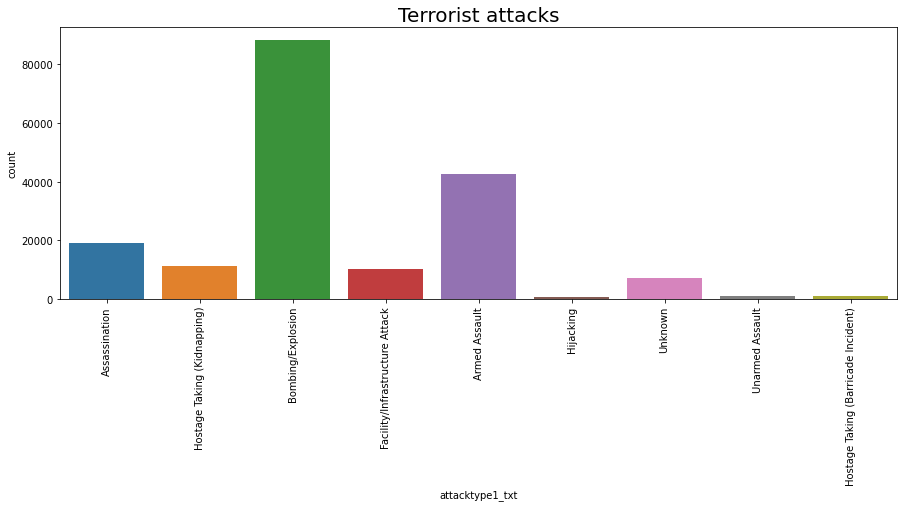

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(data.attacktype1_txt)
plt.xticks(rotation=90)
plt.title('Terrorist attacks',fontsize=20)
plt.show()

##### In this graph, let's go through with different types of attack.
##### we can see that Bombing/Explosion is the highest number of attack type happened also Armed Assault

### Let's check the most Target of Terrorism

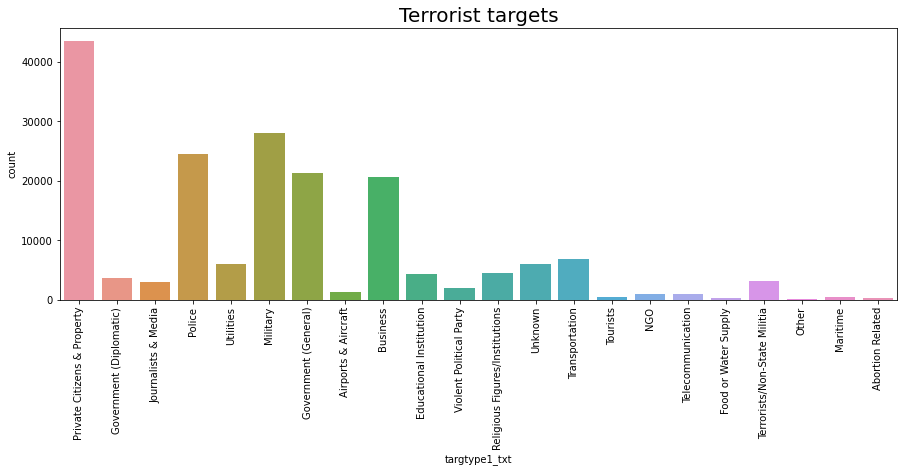

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(data.targtype1_txt)
plt.xticks(rotation=90)
plt.title('Terrorist targets',fontsize=20)
plt.show()

#### From this graph, we can see that Private Citizens & Property ,Police, Military, Government and Buisiness are the main target of Terrorist group

## Let's see which type of weapon is most preferred by Terrosrists

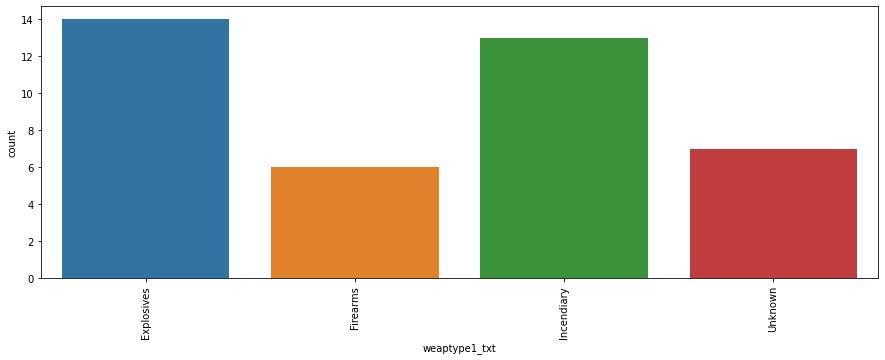

In [14]:
plt.figure(figsize=(15,5))
s1=sns.countplot(data.weaptype1_txt.iloc[:40].sort_values(ascending=True))
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### From this, we can see that Explosives type weapons are most used and Incendiary

### Terrorist Activities by Region in each Year

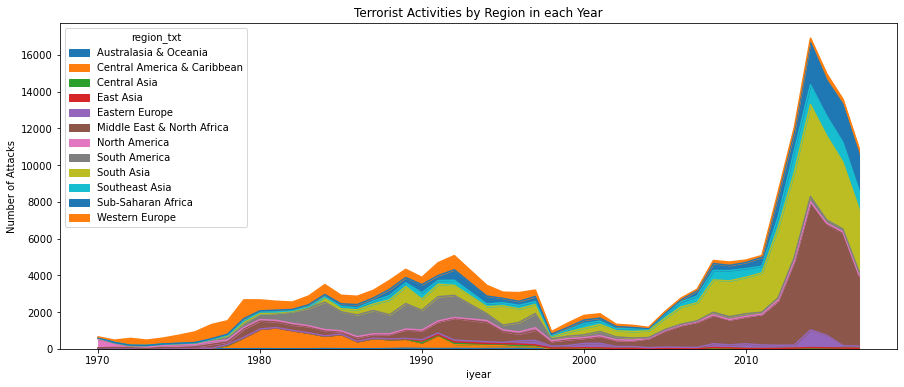

In [15]:
pd.crosstab(data.iyear, data.region_txt).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

#### By analyzing this graph, from last decade we can see exponential growth of terrorist activities in whole world

### Top Countries Affected

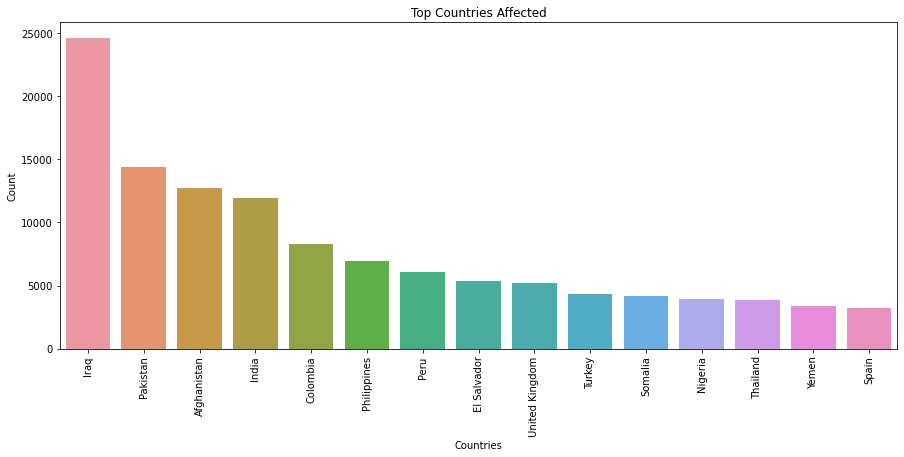

In [16]:
plt.figure(figsize=(15,6))
x=data['country_txt'].value_counts()[:15].index
y=data['country'].value_counts()[:15]
sns.barplot(x,y)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

#### It appears that Iraq, Afghanistan and Pakistan are the most damaged countries during terrorist attacks

### Let's check the Terrorist groups

In [17]:
data.gname.value_counts()[1:15]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: gname, dtype: int64

##### Taliban,Islamic State of Iraq and the Levant (ISIL),Shining Path (SL) and Farabundo Marti National Liberation Front (FMLN) are the largest  and active Terrorist Groups

# Conclusion:
###### Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences.
###### The Middle East and North Africa are seen to be the places of serious terrorist attacks.
###### In addition, look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries during terrorist attacks.

